In [514]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from random import sample
from numpy.random import uniform
from scipy.spatial.distance import cdist
from math import isnan
from scipy.stats import boxcox
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

1. Load and Explore the Data

In [515]:
data = pd.read_csv("WineQT.csv")

print("Jumlah baris dan kolom:", data.shape)

print(data.info())
print("Jumlah missing values per kolom:")
print(data.isnull().sum())

data.head()

print(type(data))

missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Persentase Missing Values:")
print(missing_percentage)

print(data['quality'].value_counts())

data.sample(5)



Jumlah baris dan kolom: (1143, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
Jumlah missing values per kolom:
fi

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
1130,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
443,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5,627
399,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,557
385,9.5,0.460,0.49,6.3,0.064,5.0,17.0,0.99880,3.21,0.73,11.0,6,541


### **2. Descriptive Statistics and Visualizations**

In [516]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


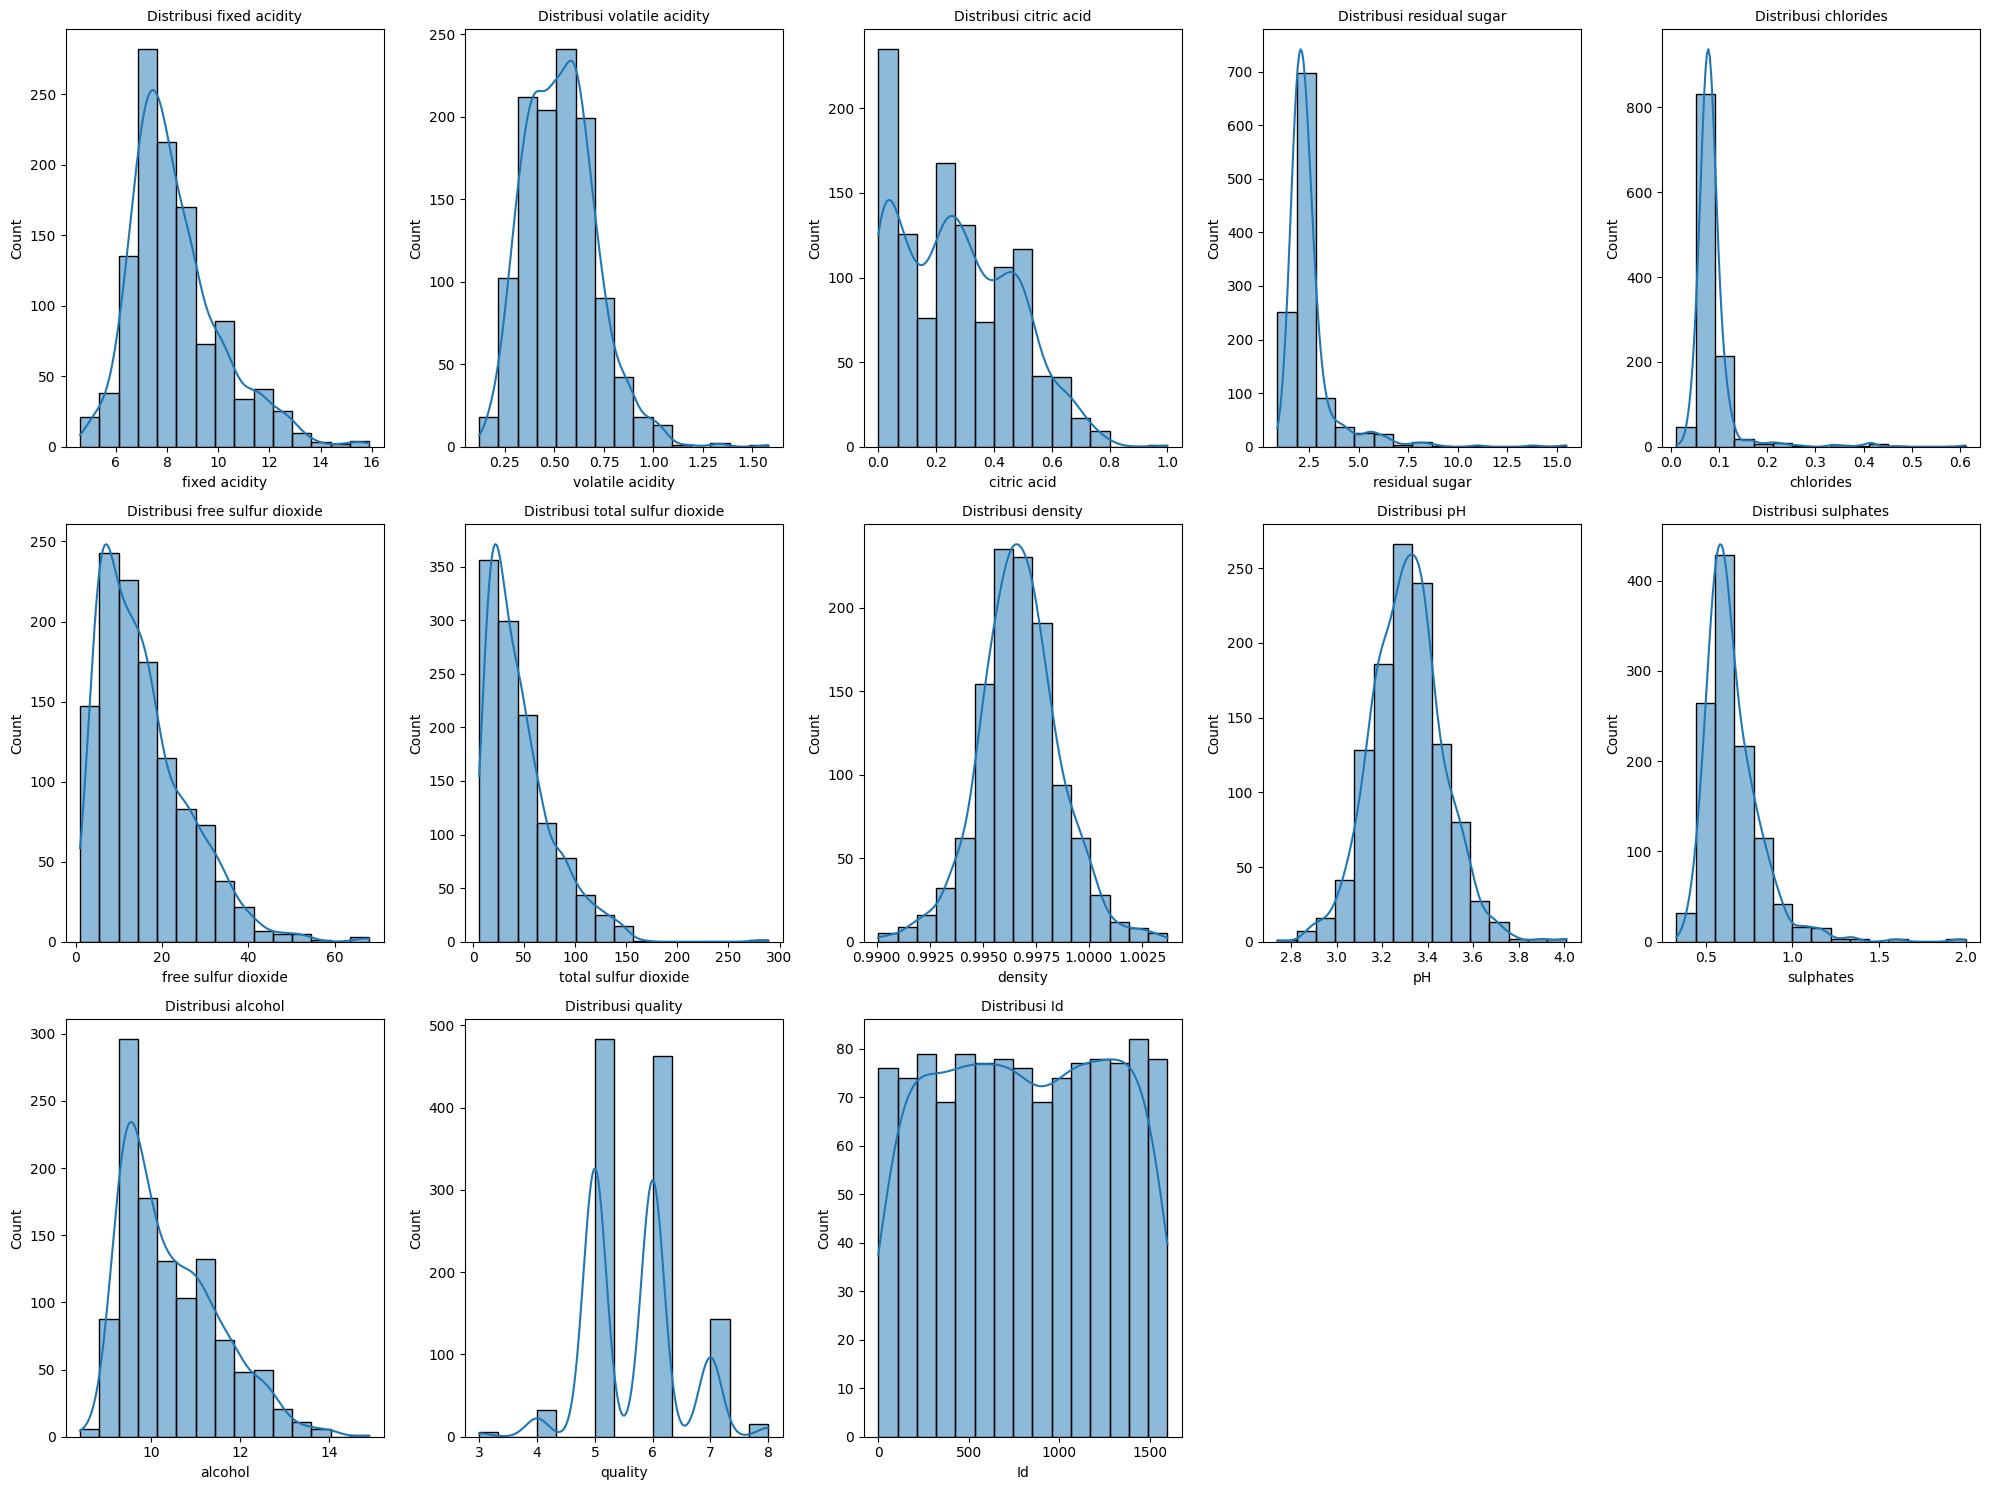

In [517]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numerical_cols)

cols_per_row = 5
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 5))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}", fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [518]:
columns_list = []
skewness_list = []

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    columns_list.append(column)
    skewness_list.append(data[column].skew())

data_skew_kurt = pd.DataFrame({
    'columns': columns_list,
    'skewness': skewness_list
})

data_skew_kurt


,columns,skewness
0,fixed acidity,1.044930
1,volatile acidity,0.681547
2,citric acid,0.371561
3,residual sugar,4.361096
4,chlorides,6.026360
5,free sulfur dioxide,1.231261
6,total sulfur dioxide,1.665766
7,density,0.102395
8,pH,0.221138
9,sulphates,2.497266


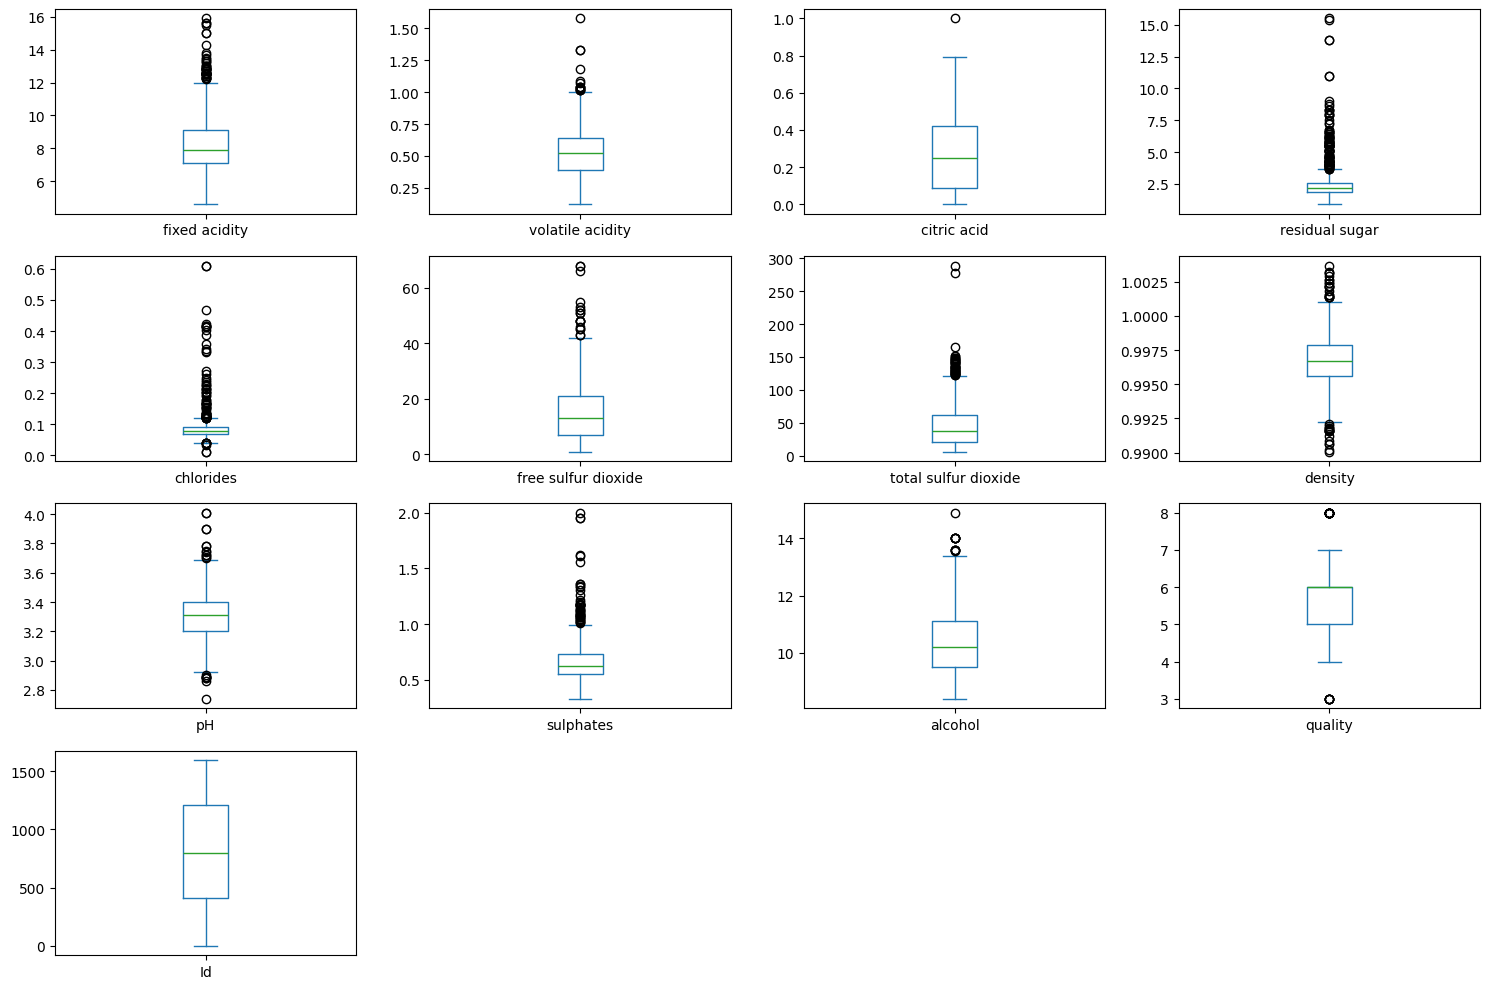

In [519]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [520]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

threshold = 3

outliers = np.where(z_scores > threshold)
outlier_rows = data.iloc[outliers[0]]
outlier_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
11,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.10,5,13
13,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.20,6,19
30,7.5,0.49,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.50,6,42
31,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.30,5,43
32,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,1505
1111,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5,1558
1111,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5,1558
1111,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5,1558


### **3. Correlation and Redundancy Check**

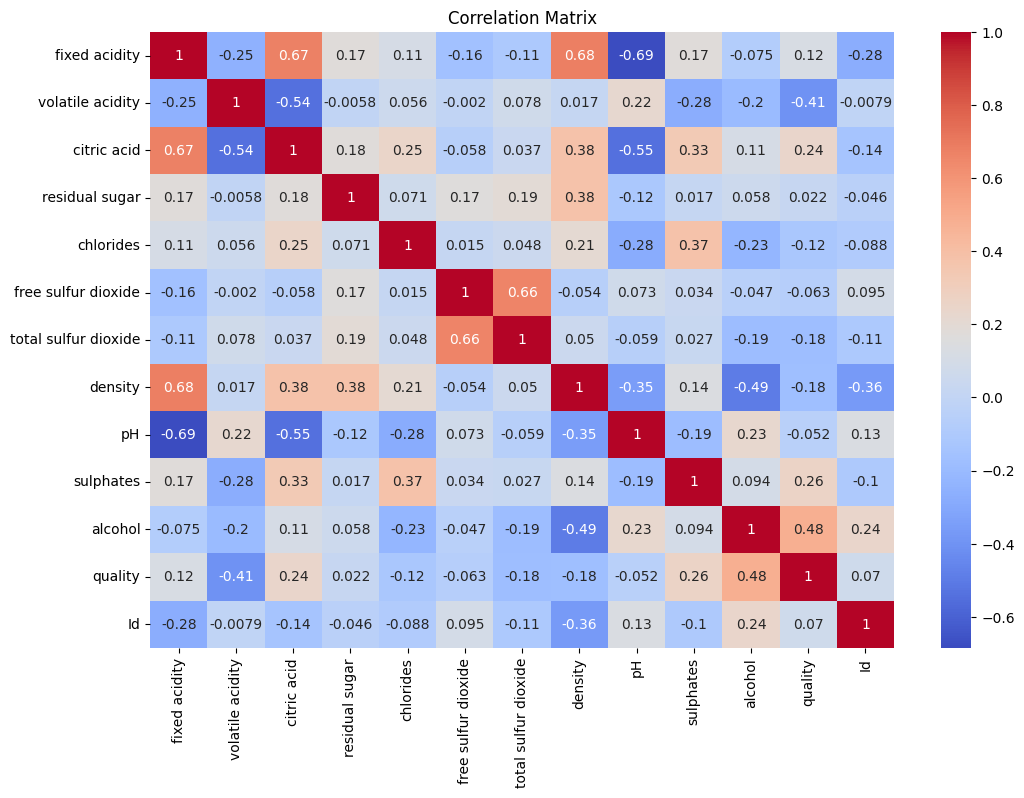

In [521]:
import seaborn as sns

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### **4. Hasil Eksplorasi Data**

## Hasil Eksplorasi Data

1. Dataset terdiri dari **1143 data** dan **13 fitur**.
2. Terdapat satu fitur dengan data kategorikal yang merupakan **label**, yaitu **quality**, dan ada satu fitur yang merupakan identifier yaitu **id**
3. Tidak terdapat **missing values** ataupun **duplicate values**.
4. **Distribusi data** untuk fitur-fitur yang perlu dilakukan transformasi sebagai berikut:
   - **Fixed acidity**
   - **Residual Sugar**
   - **Chlorides**
   - **Free Sulfur Dioxide**
   - **Total Sulfur Dioxide**
   - **Sulphates**

5. Terdapat **data outlier** pada fitur berikut:
   - **Fixed acidity**
   - **Volatile acidity**
   - **Residual sugar**
   - **Citric acid**
   - **Chlorides**
   - **Free sulfur dioxide**
   - **Total sulfur dioxide**
   - **Sulphates**
   - **Density**
   - **Alcohol**
   - **Ph**
   - Jumlah data outlier: **133**.


### Korelasi:

#### Korelasi Kuat:
- **Density dan Fixed Acidity**: r = 0.68  
  Menunjukkan hubungan positif yang kuat, yang berarti wine dengan kadar asam tetap yang lebih tinggi cenderung memiliki densitas yang lebih tinggi.

- **Free Sulfur Dioxide dan Total Sulfur Dioxide**: r = 0.66  
  Memiliki korelasi positif yang kuat, yang menunjukkan bahwa peningkatan satu jenis sulfur dioksida berhubungan dengan peningkatan jenis lainnya.

#### Korelasi Sedang:
- **Volatile Acidity dan Quality**: r = -0.41  
  Menunjukkan hubungan negatif yang sedang, yang berarti peningkatan satu variabel cenderung diikuti oleh penurunan variabel lainnya.

- **Alcohol dan Residual Sugar**: r = -0.49  
  Menunjukkan korelasi negatif yang sedang, yang berarti peningkatan kadar alkohol berhubungan dengan penurunan kadar gula residu.

#### Korelasi Lemah:
- Banyak fitur menunjukkan korelasi lemah, seperti:
  - **Chlorides dan Quality**: r = -0.09
  - **Free Sulfur Dioxide dan Quality**: r = 0.05  
  Ini menunjukkan bahwa tidak ada hubungan yang signifikan antara variabel-variabel ini.



### **5. Preprocessing Data**

Menghapus fitur yang tidak digunakan

In [522]:
clean_data = data.drop(columns=['Id', 'quality'], axis=1)

Penanganan Outlier

Winsorize

In [523]:
from scipy.stats.mstats import winsorize
import pandas as pd
import matplotlib.pyplot as plt

for column in clean_data.select_dtypes(include=['float64', 'int64']).columns:
    clean_data[column] = winsorize(clean_data[column], limits=[0.05, 0.095])



Tranformasi menggunakan loglp

In [524]:
logd = ['fixed acidity','residual sugar', 'chlorides', 'sulphates', 'free sulfur dioxide' , 'total sulfur dioxide']
for col in logd:
    clean_data[col] = np.log1p(clean_data[col])

print("Infinity values:", np.isinf(clean_data).sum().sum())
print("NaN values:", clean_data.isnull().sum().sum())

Infinity values: 0
NaN values: 0


Normalisasi

In [525]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
features = clean_data.select_dtypes(include=['float64', 'int64']).columns
clean_data[features] = scaler.fit_transform(clean_data[features])

In [526]:
columns_list = []
skewness_list = []

for column in clean_data.select_dtypes(include=['float64', 'int64']).columns:
    columns_list.append(column)
    skewness_list.append(clean_data[column].skew())

data_skew_kurt = pd.DataFrame({
    'columns': columns_list,
    'skewness': skewness_list
})

data_skew_kurt

,columns,skewness
0,fixed acidity,0.248269
1,volatile acidity,0.000759
2,citric acid,0.083051
3,residual sugar,0.716286
4,chlorides,0.242920
5,free sulfur dioxide,-0.136287
6,total sulfur dioxide,-0.089986
7,density,-0.087306
8,pH,-0.056887
9,sulphates,0.387764


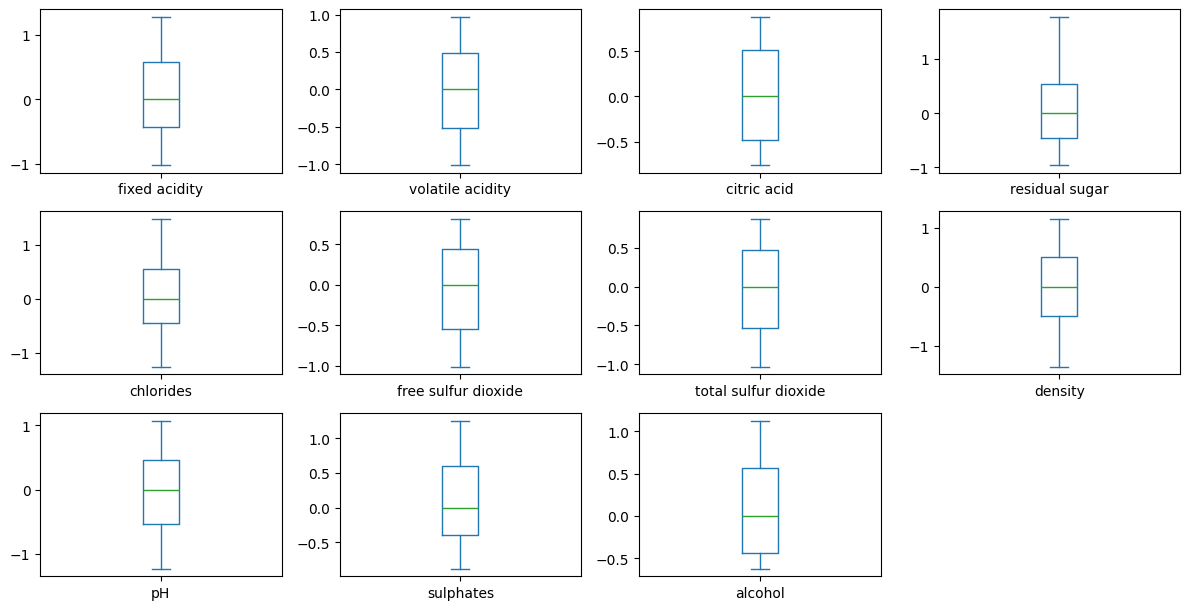

In [527]:
clean_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [528]:
from scipy import stats
z_scores = np.abs(stats.zscore(clean_data.select_dtypes(include=[np.number])))
threshold = 3
outliers = np.where(z_scores > threshold)

print("Jumlah Outliers Tersisa:", len(outliers[0]))


Jumlah Outliers Tersisa: 0


 **6. Cluster Tendency Test**

In [529]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

hopkins_stat = hopkins(clean_data)
print(f"Hopkins Statistic: {hopkins_stat}")

Hopkins Statistic: 0.7169979384507651


**8. Applying Clustering Algorithm (K-Means)**

Elbow Method

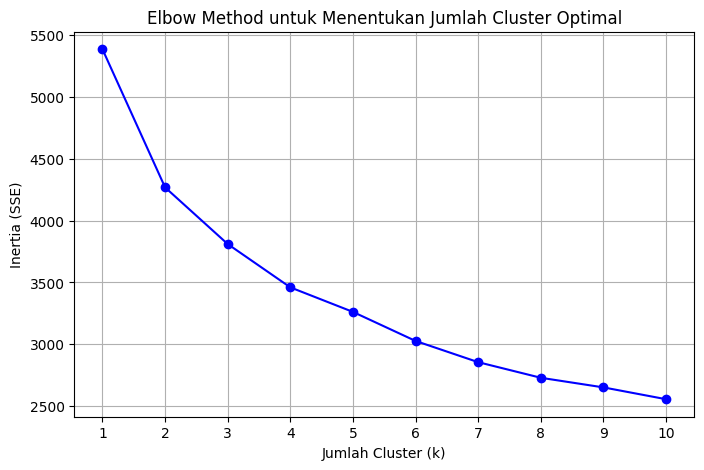

In [530]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clean_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bx-', marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(K)
plt.grid(True)
plt.show()


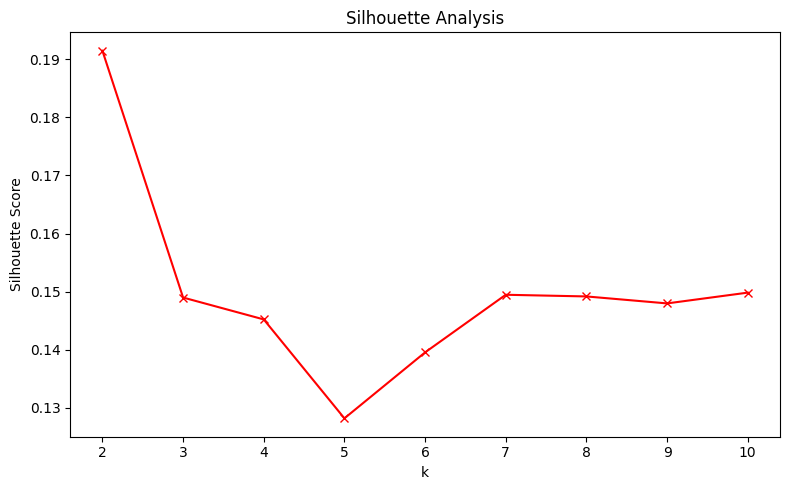

In [531]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clean_data)
    silhouette_scores.append(silhouette_score(clean_data, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

In [533]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(clean_data)

clean_data['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

In [534]:
for cluster in sorted(clean_data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    cluster_data = clean_data[clean_data['Cluster'] == cluster]
    print(cluster_data.describe())


Cluster 0:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     498.000000        498.000000   498.000000      498.000000   
mean        0.635985         -0.093140     0.366009        0.536580   
std         0.543113          0.592529     0.469547        0.819281   
min        -0.836408         -1.010101    -0.757576       -0.960301   
25%         0.247691         -0.565657     0.000000        0.000000   
50%         0.662037         -0.141414     0.484848        0.414443   
75%         1.200672          0.363636     0.787879        1.229791   
max         1.278137          0.969697     0.878788        1.777847   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  498.000000           498.000000            498.000000  498.000000   
mean     0.480622            -0.066566              0.040076    0.543678   
std      0.696152             0.588359              0.618416    0.489936   
min     -1.265845            -1.017812      

# **Analisis Hasil Clustering**

## **Cluster 0**
1. **Jumlah Data:** 498 sampel

2. **Karakteristik Utama:**
   - **Fixed Acidity:**
     - Rata-rata 0.63 dengan rentang dari -0.83 hingga 1.27.
     - Relatif lebih tinggi dibandingkan Cluster 1, menunjukkan kandungan asam yang lebih besar.
   - **Volatile Acidity:**
     - Rata-rata -0.09, dengan nilai minimum -1.01 dan maksimum 0.97.
     - Angka ini mengindikasikan tingkat keasaman volatil lebih stabil dan rendah dibandingkan Cluster 1.
   - **Citric Acid:**
     - Rata-rata 0.36 menunjukkan kadar asam sitrat yang cukup tinggi.
     - Fitur ini cenderung positif pada banyak sampel (Q1 = 0.00, Q3 = 0.78).
   - **Residual Sugar:**
     - Rata-rata 0.53 dengan distribusi lebih bervariasi (Q1 = 0.00, Q3 = 1.22).
     - Nilai ini mengindikasikan kadar gula sisa yang lebih tinggi dibandingkan Cluster 1.
   - **Chlorides:**
     - Rata-rata 0.48 menunjukkan kandungan garam yang lebih tinggi.
     - Hal ini bisa mempengaruhi rasa wine.
   - **Free Sulfur Dioxide & Total Sulfur Dioxide:**
     - Free Sulfur Dioxide: Rata-rata -0.06 (cukup stabil).
     - Total Sulfur Dioxide: Rata-rata 0.04, dengan persebaran relatif kecil.
     - Ini menunjukkan stabilitas sulfur dalam cluster ini.
   - **Density:**
     - Rata-rata 0.54, lebih tinggi dibandingkan Cluster 1.
     - Hal ini bisa disebabkan oleh kandungan residual sugar yang lebih tinggi.
   - **pH:**
     - Rata-rata -0.43, yang lebih rendah dibandingkan Cluster 1.
     - Ini menunjukkan keasaman lebih tinggi.
   - **Sulphates:**
     - Rata-rata 0.26, dengan persebaran yang cukup lebar.
   - **Alcohol:**
     - Rata-rata -0.01, menunjukkan kadar alkohol yang rendah.

3. **Kesimpulan Cluster 0:**
   - Cluster 0 mencakup wine dengan keasaman lebih tinggi, residual sugar lebih banyak, dan kadar alkohol lebih rendah. Karakteristik ini mengindikasikan wine dengan kualitas sedang, yang mungkin memiliki rasa yang lebih tajam karena keasaman dan kandungan gula.

## **Cluster 1**
1. **Jumlah Data:** 645 sampel

2. **Karakteristik Utama:**
   - **Fixed Acidity:**
     - Rata-rata -0.31, lebih rendah dibandingkan Cluster 0.
     - Rentang dari -1.02 hingga 1.08, menunjukkan tingkat keasaman lebih ringan.
   - **Volatile Acidity:**
     - Rata-rata 0.08, sedikit lebih tinggi dibandingkan Cluster 0.
     - Indikasi adanya keasaman volatil yang lebih kuat, tetapi tetap stabil.
   - **Citric Acid:**
     - Rata-rata -0.23, menunjukkan kadar asam sitrat yang lebih rendah.
     - Sebagian besar sampel memiliki nilai negatif (Q1 = -0.66, Q3 = 0.12).
   - **Residual Sugar:**
     - Rata-rata -0.19, lebih rendah dibandingkan Cluster 0.
     - Kandungan gula sisa lebih sedikit, mengindikasikan wine lebih kering.
   - **Chlorides:**
     - Rata-rata -0.25, lebih rendah dibandingkan Cluster 0.
     - Kandungan garam relatif rendah.
   - **Free Sulfur Dioxide & Total Sulfur Dioxide:**
     - Free Sulfur Dioxide: Rata-rata 0.01 (lebih tinggi dibanding Cluster 0).
     - Total Sulfur Dioxide: Rata-rata -0.07, tetap stabil.
   - **Density:**
     - Rata-rata -0.41, lebih rendah dibandingkan Cluster 0.
     - Menunjukkan tingkat kepadatan yang lebih rendah, sesuai dengan kandungan gula lebih kecil.
   - **pH:**
     - Rata-rata 0.31, lebih tinggi dibandingkan Cluster 0.
     - Menunjukkan wine memiliki tingkat keasaman lebih rendah (lebih basa).
   - **Sulphates:**
     - Rata-rata -0.01, sedikit lebih rendah tetapi tetap stabil.
   - **Alcohol:**
     - Rata-rata 0.21, lebih tinggi dibandingkan Cluster 0.
     - Kadar alkohol yang lebih tinggi mendukung kualitas wine yang lebih baik.

3. **Kesimpulan Cluster 1:**
   - Cluster 1 mencakup wine dengan keasaman lebih rendah, kandungan gula sisa lebih kecil, dan kadar alkohol lebih tinggi. Karakteristik ini menunjukkan wine dengan kualitas baik, yang memiliki rasa lebih seimbang dan matang.

### **9. Export Model**

In [535]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

with open('model_kmeans_wine_quality.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,
        'kmeans': kmeans,
        'log_transform_cols': logd
    }, f)

print("Infinity values:", np.isinf(clean_data).sum().sum())
print("NaN values:", clean_data.isnull().sum().sum())
print("\nModel dan pipeline berhasil disimpan.")

Infinity values: 0
NaN values: 0

Model dan pipeline berhasil disimpan.


In [537]:
# 3. Fungsi untuk Menentukan Kategori Kualitas
def label_quality(cluster):
    """
    Fungsi untuk menentukan kategori kualitas berdasarkan cluster.
    """
    if cluster == 1:
        return "Baik"
    elif cluster == 0:
        return "Sedang"

# Contoh data baru
data_baru = pd.DataFrame([{
    'fixed acidity': 8.3,
    'volatile acidity': 0.625,
    'citric acid': 0.20,
    'residual sugar': 1.5,
    'chlorides': 0.080,
    'free sulfur dioxide': 27,
    'total sulfur dioxide': 119,
    'density': 0.997,
    'pH': 3.16,
    'sulphates': 1.12,
    'alcohol': 9.1,
}])



# Tambahkan kolom yang hilang (jika ada)
required_columns = ['fixed acidity', 'volatile acidity', 'citric acid',
                    'residual sugar', 'chlorides', 'free sulfur dioxide',
                    'total sulfur dioxide', 'density', 'pH',
                    'sulphates', 'alcohol']

# Transformasi log pada kolom yang diterapkan sebelumnya
log_features = ['fixed acidity', 'residual sugar', 'chlorides',
                'sulphates', 'free sulfur dioxide', 'total sulfur dioxide']
for col in log_features:
    if col in data_baru.columns:
        data_baru[col] = np.log1p(data_baru[col])

# Normalisasi menggunakan scaler yang telah dilatih
data_baru_scaled = scaler.transform(data_baru)

# Prediksi cluster untuk data baru
cluster_pred = kmeans.predict(data_baru_scaled)[0]
print(f"Data baru termasuk ke dalam cluster: {cluster_pred}")

# Tentukan kategori kualitas
predicted_quality = label_quality(cluster_pred)
print(f"Kategori kualitas: {predicted_quality}")



Data baru termasuk ke dalam cluster: 0
Kategori kualitas: Sedang
